'lp' (Line Profile) Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Line profiles have an extra dimension than [LC](LC.ipynb) and [RV](RV.ipynb) datasets which have times as their independent variable.  For that reason, the parameters in the LP dataset are tagged with individual times instead of having a separate times array.  This allows the flux_densities and sigmas to be per-time.  Because of this, `times` is not a parameter, but instead **must** be passed when you call [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md) if you want to attach actual line-profile data (`flux_densities`) to your dataset.  At that point, in order to change the times you would need to remove and re-add the dataset.  If you only want to compute synthetic line profiles, use `compute_times` or `compute_phases` instead.

Let's add a line profile dataset to the Bundle (see also the [lp API docs](../api/phoebe.parameters.dataset.lp.md)).  Some parameters are only visible based on the values of other parameters, so we'll pass `check_visible=False` (see the [filter API docs](../api/phoebe.parameters.ParameterSet.filter.md) for more details).  These visibility rules will be explained below.

In [3]:
b.add_dataset('lp', times=[0,1,2], wavelengths=phoebe.linspace(549, 551, 101))
print(b.get_dataset(kind='lp', check_visible=False))

ParameterSet: 49 parameters
       compute_times@lp01@dataset: [] d
C     compute_phases@lp01@dataset: []
       phases_period@lp01@dataset: period
         phases_dpdt@lp01@dataset: dpdt
           phases_t0@lp01@dataset: t0_supconj
        solver_times@lp01@dataset: auto
        profile_func@lp01@dataset: gaussian
        profile_rest@lp01@dataset: 550.0 nm
          profile_sv@lp01@dataset: 0.0001
            passband@lp01@dataset: Johnson:V
    intens_weighting@lp01@dataset: energy
   wavelengths@primary@lp01@da...: [] nm
   wavelengths@secondary@lp01@...: [] nm
   wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm
   00.000000@flux_densities@pr...: [] W / (m2 nm)
   00.000000@flux_densities@se...: [] W / (m2 nm)
   00.000000@flux_densities@bi...: [] W / (m2 nm)
   00.000000@sigmas@primary@lp...: [] W / (m2 nm)
   00.000000@sigmas@secondary@...: [] W / (m2 nm)
   00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
   00.000000@sigmas_lnf@primar...: -inf


For information on the included passband-dependent parameters (not mentioned below), see the section on the [lc dataset](LC.ipynb).

### times

In [4]:
print(b.get_dataset(kind='lp').times)

['00.000000', '01.000000', '02.000000']


### compute_times / compute_phases

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [5]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@lp01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.  If empty, will use times of individual entries.  Note that interpolation is not currently supported for lp datasets.
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@lp01@dataset
                      Related to: phases_period@lp01@dataset, period@binary@component, period_anom@binary@component, phases_dpdt@lp01@dataset, dpdt@binary@component, phases_t0@lp01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lp01@dataset



In [6]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@lp01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.
                           Value: []
                  Constrained by: compute_times@lp01@dataset, phases_period@lp01@dataset, period@binary@component, period_anom@binary@component, phases_dpdt@lp01@dataset, dpdt@binary@component, phases_t0@lp01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component
                      Constrains: None
                      Related to: compute_times@lp01@dataset, phases_period@lp01@dataset, period@binary@component, period_anom@binary@component, phases_dpdt@lp01@dataset, dpdt@binary@component, phases_t0@lp01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component



In [7]:
print(b.get_parameter(qualifier='phases_t0'))

Parameter: phases_t0@lp01@dataset
                       Qualifier: phases_t0
                     Description: t0 to use when converting between compute_times and compute_phases as well as when applying mask_phases
                           Value: t0_supconj
                         Choices: t0_supconj, t0_perpass, t0_ref
                  Constrained by: 
                      Constrains: compute_phases@lp01@dataset
                      Related to: compute_times@lp01@dataset, phases_period@lp01@dataset, period@binary@component, period_anom@binary@component, phases_dpdt@lp01@dataset, dpdt@binary@component, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lp01@dataset
                 Only visible if: hierarchy.is_meshable:False



### wavelengths

In [8]:
print(b.filter(qualifier='wavelengths'))

ParameterSet: 3 parameters
   wavelengths@primary@lp01@da...: [] nm
   wavelengths@secondary@lp01@...: [] nm
   wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm


In [9]:
print(b.get_parameter(qualifier='wavelengths', component='binary'))

Parameter: wavelengths@binary@lp01@dataset
                       Qualifier: wavelengths
                     Description: Wavelengths of the observations
                           Value: <linspace start=549.0 stop=551.0 num=101 endpoint=True unit=nm>
                  Constrained by: 
                      Constrains: None
                      Related to: None



### components

Line profiles will be computed for each component in which the wavelengths are provided.  If we wanted to expose the line profile for the binary as a whole, we'd set the wavelenghts for `wavelengths@binary`.  If instead we wanted to expose per-star line profiles, we could set the wavelengths for both `wavelengths@primary` and `wavelengths@secondary`.

If you're passing wavelengths to the [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md) call, it will default to filling the wavelengths at the *system-level*.  To override this, pass `components=['primary', 'secondary']`, as well.  For example: `b.add_dataset('lp', wavelengths=np.linspace(549,551,101), components=['primary', 'secondary'])`.

### flux_densities

Note that observation `flux_densities` parameters are exposed per-time, according to the value of `times` passed to [add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md).

`flux_densities` parameters will be exposed in the model based on `compute_times`/`compute_phases` if not empty, otherwise according to `times`.  For more information, see the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [10]:
print(b.filter(qualifier='flux_densities'))

ParameterSet: 3 parameters
   00.000000@flux_densities@bi...: [] W / (m2 nm)
   01.000000@flux_densities@bi...: [] W / (m2 nm)
   02.000000@flux_densities@bi...: [] W / (m2 nm)


In [11]:
print(b.get_parameter(qualifier='flux_densities', 
                      component='binary',
                      time=0.0))

Parameter: 00.000000@flux_densities@binary@lp01@dataset
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### sigmas

Note that, like `flux_densities`, `sigmas` parameters are exposed per-time, according to the value of `times` passed to [add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md).

In [12]:
print(b.filter(qualifier='sigmas'))

ParameterSet: 3 parameters
   00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
   01.000000@sigmas@binary@lp0...: [] W / (m2 nm)
   02.000000@sigmas@binary@lp0...: [] W / (m2 nm)


In [13]:
print(b.get_parameter(qualifier='sigmas', 
                      component='binary',
                      time=0))

Parameter: 00.000000@sigmas@binary@lp01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux_densities
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### profile_func

In [14]:
print(b.get_parameter(qualifier='profile_func'))

Parameter: profile_func@lp01@dataset
                       Qualifier: profile_func
                     Description: Function to use for the rest line profile
                           Value: gaussian
                         Choices: gaussian, lorentzian
                  Constrained by: 
                      Constrains: None
                      Related to: None



### profile_rest

In [15]:
print(b.get_parameter(qualifier='profile_rest'))

Parameter: profile_rest@lp01@dataset
                       Qualifier: profile_rest
                     Description: Rest central wavelength of the profile
                           Value: 550.0 nm
                  Constrained by: 
                      Constrains: None
                      Related to: None



### profile_sv

In [16]:
print(b.get_parameter(qualifier='profile_sv'))

Parameter: profile_sv@lp01@dataset
                       Qualifier: profile_sv
                     Description: Subsidiary value of the profile
                           Value: 0.0001
                  Constrained by: 
                      Constrains: None
                      Related to: None



Synthetics
------------------

In [17]:
b.run_compute(irrad_method='none')

100%|██████████| 3/3 [00:00<00:00, 17.63it/s]


<ParameterSet: 5 parameters | qualifiers: flux_densities, comments, wavelengths>

In [18]:
print(b.filter(context='model').twigs)

['wavelengths@binary@lp01@phoebe01@latest@lp@model', '00.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model', '01.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model', '02.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model', 'comments@phoebe01@latest@model']


The model for a line profile dataset will expose flux-densities at each time and for each component where the corresponding wavelengths Parameter was not empty.  Here since we used the default and exposed line-profiles for the entire system, we have a single entry per-time.

In [19]:
print(b.filter(qualifier='flux_densities', context='model'))

ParameterSet: 3 parameters
R  00.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
R  01.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
R  02.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)


In [20]:
print(b.get_parameter(qualifier='flux_densities', context='model', time=0))

Parameter: 00.000000@flux_densities@latest@model
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



Plotting
---------------

By default, LP datasets plot as 'flux_densities' vs 'wavelengths' for a **single time**.

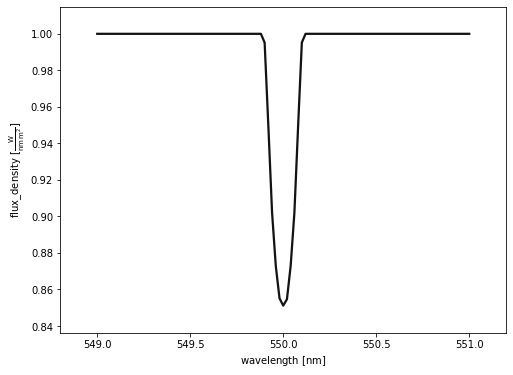

In [21]:
afig, mplfig = b.filter(dataset='lp01', context='model', time=0).plot(show=True)

Mesh Fields
---------------------

Let's add a single mesh and see which columns from the line profile dataset are available to expose as a column in the mesh.

In [22]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

Tue, 06 Jul 2021 16:49 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: compute, dataset, constraint, figure>

In [23]:
print(b.get_parameter(qualifier='columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'abs_intensities@lp01', 'abs_normal_intensities@lp01', 'boost_factors@lp01', 'ldint@lp01', 'abs_pblum_ext@lp01', 'ptfarea@lp01', 'rvs@lp01']


Since line profiles are passband-dependent, we get all passband-dependent mesh quantities (except relative intensities/luminosities that would require pblum scaling) as options (see [LC](LC.ipynb) for details).  Additionally, we get `rvs@lp01`, which under-the-hood is being used to determine the doppler shift of the line profile per-element and then summed over the star (see [RV](RV.ipynb) for details).  To avoid large amounts of data being stored in the mesh with an extra dimension, the per-element line profiles are never stored, and therefore not able to be exposed to the user.